# SC1015 Mini-Project: Spotify music recommender system

### By group _

## Our problem statement

For our project, we will be using the Spotify Dataset on kaggle:  for training our models.

Our problem statement for this project would be 

## Data Preparation and Cleaning

In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Libraries to be used later
import spotipy

In [3]:
dataset1_df = pd.read_csv('dataset.csv')
print(dataset1_df.shape)


try:
    dataset2_df = pd.read_csv('spotify2023.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        dataset2_df = pd.read_csv('spotify2023.csv', encoding='latin-1')
    except UnicodeDecodeError:
        dataset2_df = pd.read_csv('spotify2023.csv', encoding='cp1252')
print(dataset2_df.shape)

(114000, 21)
(953, 24)


In [4]:
columns_to_drop = ['track_id', 'album_name','explicit','time_signature','track_genre', 'Unnamed: 0']
dataset1_df.drop(columns_to_drop, axis=1, inplace=True)
dataset1_df.head()

,artists,track_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Gen Hoshino,Comedy,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917
1,Ben Woodward,Ghost - Acoustic,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489
2,Ingrid Michaelson;ZAYN,To Begin Again,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332
3,Kina Grannis,Can't Help Falling In Love,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740
4,Chord Overstreet,Hold On,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949


In [5]:
numerical_df = dataset1_df.select_dtypes(include='number')

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)
scaled_df = pd.DataFrame(scaled_data, columns=numerical_df.columns)

# Calculate correlation coefficients
correlation_coefficients = scaled_df.corr()['popularity'].drop('popularity')

# Print correlation coefficients
print(correlation_coefficients)

duration_ms        -0.007101
danceability        0.035448
energy              0.001056
key                -0.003853
loudness            0.050423
mode               -0.013931
speechiness        -0.044927
acousticness       -0.025472
instrumentalness   -0.095139
liveness           -0.005387
valence            -0.040534
tempo               0.013205
Name: popularity, dtype: float64


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = dataset1_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = dataset1_df['popularity']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predictions on training set
y_train_pred = model.predict(X_train)

# Evaluate model performance on training set
print("Training Set:")
print("Mean Squared Error:", mean_squared_error(y_train, y_train_pred))
print("R-squared:", r2_score(y_train, y_train_pred))

# Predictions on testing set
y_test_pred = model.predict(X_test)

# Evaluate model performance on testing set
print("\nTesting Set:")
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
print("R-squared:", r2_score(y_test, y_test_pred))

Training Set:
Mean Squared Error: 486.9298853348964
R-squared: 0.023230748462878648

Testing Set:
Mean Squared Error: 483.3136485930432
R-squared: 0.020603101317393846


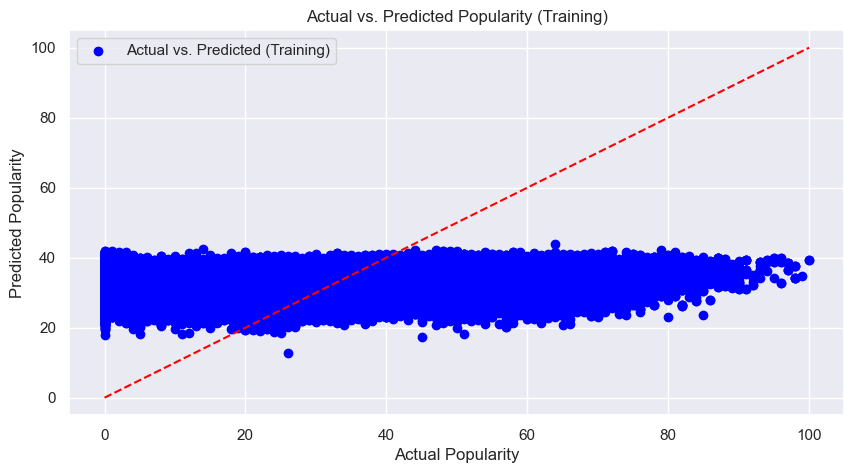

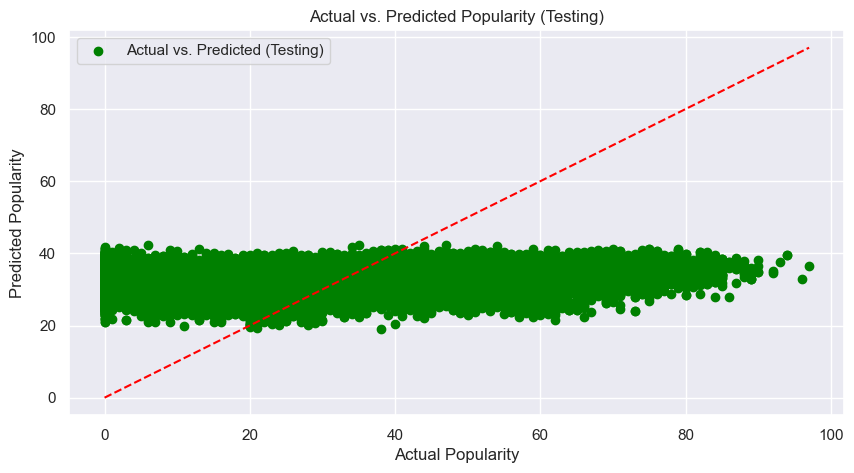

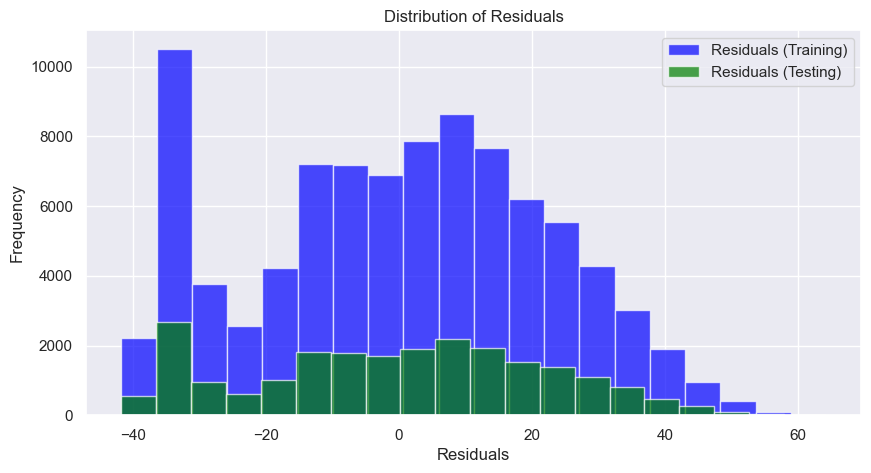

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Popularity (Training)')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs. predicted popularity for testing set
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, color='green', label='Actual vs. Predicted (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Popularity (Testing)')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.legend()
plt.grid(True)
plt.show()

# Plot distribution of residuals
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

plt.figure(figsize=(10, 5))
plt.hist(residuals_train, bins=20, color='blue', alpha=0.7, label='Residuals (Training)')
plt.hist(residuals_test, bins=20, color='green', alpha=0.7, label='Residuals (Testing)')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

# Randomly sample a subset of the dataset
sampled_df = dataset1_df.sample(n=1000, random_state=42)  # Adjust 'n' to specify the desired sample size

# Convert features of the sampled dataset to a sparse matrix
features_sparse = csr_matrix(sampled_df[['popularity','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])

# Compute cosine similarity matrix between songs based on features
similarity_matrix_sparse = cosine_similarity(features_sparse, dense_output=False)

print(similarity_matrix_sparse)
# Define a function to recommend songs similar to a given song
def recommend_similar_songs(song_index, top_n=5):
    song_similarities = similarity_matrix_sparse[song_index].toarray().ravel()
    similar_song_indices = song_similarities.argsort()[-top_n-1:-1][::-1]  # Exclude the song itself
    similar_songs = sampled_df.iloc[similar_song_indices]
    return similar_songs

# Example: Recommend similar songs to a given song (replace 'song_index' with actual song index)
recommended_songs = recommend_similar_songs(song_index=0, top_n=5)
song = sampled_df.iloc[0]
print(f"original song: {song['track_name']}")
print(recommended_songs[['track_name', 'artists', 'popularity']])



  (0, 986)	0.8940626888206482
  (0, 981)	0.9474777680316866
  (0, 980)	0.947584735940621
  (0, 972)	0.9474184994158111
  (0, 971)	0.9473057868289686
  (0, 970)	0.9475782043559762
  (0, 965)	0.94730428753475
  (0, 964)	0.9463187891578543
  (0, 962)	0.9474837246219201
  (0, 960)	0.9021229182805194
  (0, 958)	0.9475629759117294
  (0, 956)	0.9475102245428835
  (0, 952)	0.9475999080686074
  (0, 950)	0.9472531335058979
  (0, 947)	0.9465308843104571
  (0, 941)	0.9474731422314009
  (0, 936)	0.9461615696757104
  (0, 932)	0.9468682051982562
  (0, 930)	0.9198668442822597
  (0, 929)	0.9467149940115408
  (0, 925)	0.9471183878079412
  (0, 903)	0.9447734636782635
  (0, 896)	0.9453588133725628
  (0, 888)	0.9476158409526871
  (0, 876)	0.9475433576744493
  :	:
  (999, 30)	0.9884373035210617
  (999, 28)	0.9642916978545361
  (999, 27)	0.9144027595258791
  (999, 26)	0.9887312982473159
  (999, 25)	0.9557148298781031
  (999, 24)	0.9249234286180991
  (999, 23)	0.9468559568684798
  (999, 22)	0.9599468976834248

## Exploratory Data Analysis

## Our Models

## Data-driven insights and the recommendations

In [22]:
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

# Randomly sample a subset of the dataset
sampled_df = dataset1_df.sample(n=1000, random_state=42)  # Adjust 'n' to specify the desired sample size

# Select the first 5 songs from the sampled DataFrame
user_input_songs = sampled_df.head(5)

# Convert features of the sampled dataset to a sparse matrix
features_sparse = csr_matrix(user_input_songs[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])

# Compute cosine similarity matrix between songs based on features
similarity_matrix_sparse = cosine_similarity(features_sparse, dense_output=False)

# Define a function to recommend songs similar to a given set of songs
def recommend_similar_songs(songs, top_n=5):
    song_indices = songs.index.tolist()  # Get the indices of the songs in the DataFrame
    song_similarities = similarity_matrix_sparse[song_indices][:, song_indices]  # Slice the similarity matrix for selected songs
    similar_song_indices = song_similarities.sum(axis=1).A1.argsort()[-top_n:][::-1]  # Get indices of top similar songs
    similar_songs = sampled_df.iloc[similar_song_indices]
    return similar_songs

# Example: Recommend similar songs based on the first 5 songs in the sampled DataFrame
recommended_songs = recommend_similar_songs(user_input_songs, top_n=5)
print("Recommended similar songs:")
print(recommended_songs[['track_name', 'artists', 'popularity']])



IndexError: index (113186) out of range